<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DeepLearning/blob/main/03.NLP-with-tensorflow2.0/ch03_04_%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D_Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.04_순환신경망 - Bidirectional-LSTM
---

* 날짜:
* 이름:


## 학습내용
    - 순환 신경망에 대해 이해한다.
    - BiLSTM
    - 로이터 뉴스기사 카테고리 분류
    - 스팀 리뷰 걈성 분류

```
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning
```

```
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *
from plot_result import *
```

## 로이터 뉴스 기사 분류
---

### | 데이터 전처리 

#### **데이터 불러오기**

#### **데이터 확인**

### | 임베딩 매트릭스 제작

```
! gdown https://drive.google.com/u/0/uc?id=1ams5_zp8NrfmbxSzTDCglRpAvjFGi5JY&export=download
! unzip  /content/glove.6B.zip
```


#### **단어-임베딩 딕셔너리**

In [ ]:
embeddings_index = {}
f = open('glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

#### **인덱싱-단어 딕셔너리**

#### **매트릭스 제작**

In [ ]:
EMB_DIMS=100
embedding_matrix = np.zeros((MAX_FEATURES, EMB_DIMS))
print('임베딩 매트릭스 (W): ' , embedding_matrix.shape)
for i in range(1, MAX_FEATURES):
  idx=i+4
  word = index2word.get(idx)
  vec = embeddings_index.get(word)
  if vec is not None:
    embedding_matrix[i]=vec
    #print(i, idx, word, vec)

임베딩 매트릭스 (W):  (1000, 100)


### | 모델학습 1

이때까지 배운 레이어를 사용하여 모델을 구축하세요.

```
Embedding()
RNN()
LSTM()
GRU()
GlobalAveragePooling1D()
Dense()
```

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding (Embedding)       (None, 128, 100)          100000    
                                                                 
 gru (GRU)                   (None, 128, 64)           31872     
                                                                 
 gru_1 (GRU)                 (None, 128, 64)           24960     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 46)                2990      
                                                             

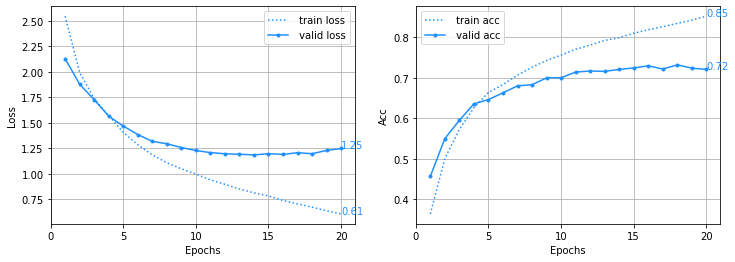

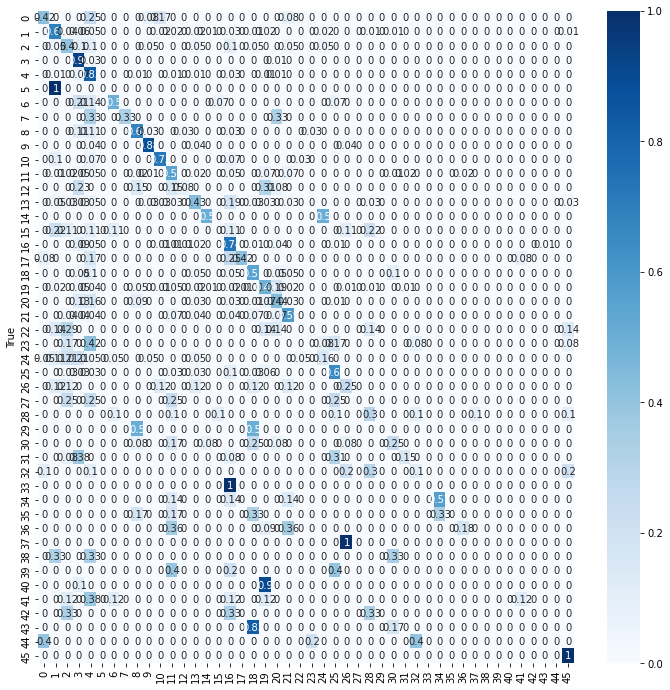

In [ ]:

EMB_DIMS = 100
x = layers.Input(shape=MAX_LEN) # 문장 최대길이
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)  # 단어 표현 크기
y = layers.GRU(64, return_sequences=True)(y)
y = layers.GRU(64, return_sequences=True)(y)
y = layers.GlobalAveragePooling1D()(y)
y = layers.Dense(46, activation='softmax')(y)
model = models.Model(x,y)

# 모델의 컴파일
model.layers[1].set_weights([embedding_matrix])
model.compile(loss= 'sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['acc'])

# 모델의 실행
model.summary()
history = model.fit(x_train, y_train, 
                    batch_size=100, epochs=20, 
                    validation_data=(x_test, y_test))
plot_lcurve([history], [''], ['dodgerblue'], x_itv=5)
draw_cm(model, x_test, y_test)

### | 모델학습 2

![](https://www.researchgate.net/profile/Arvind-Mohan-3/publication/324769532/figure/fig2/AS:619510805561344@1524714294669/LSTM-and-BiLSTM-Architectures.png)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 128, 100)          100000    
                                                                 
 bidirectional (Bidirectiona  (None, 128, 128)         63744     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128, 128)         74496     
 nal)                                                            
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                           

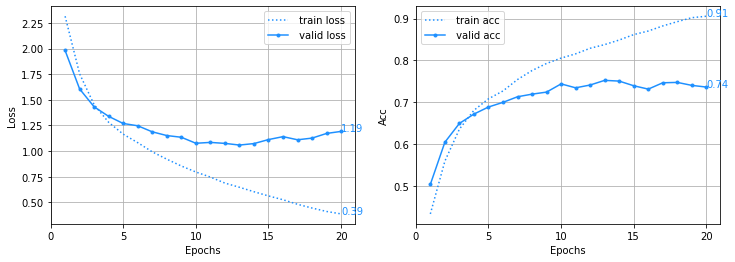

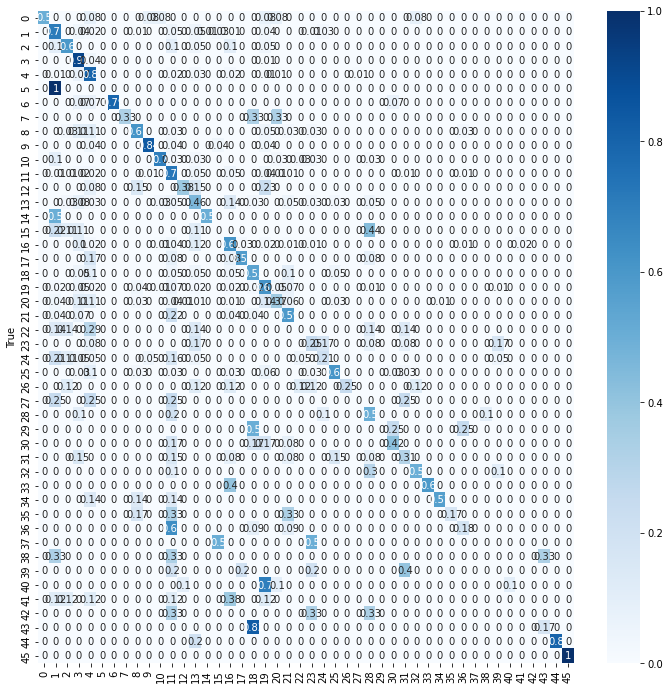

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def draw_cm(model, x_test, y_test, sparse=True, figsize=(12,12)):
  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  if sparse==False:
    y_test = np.argmax(y_test, axis=1)
  fig = plt.figure(figsize=figsize)
  cm = confusion_matrix(y_test, y_pred, normalize='true')
  cm = np.round(cm, 2)
  sns.heatmap(cm, cmap='Blues', annot=True)
  plt.ylabel('True')

EMB_DIMS = 100
x = layers.Input(shape=MAX_LEN) # 문장 최대길이
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)  # 단어 표현 크기
y = layers.Bidirectional(layers.GRU(64, return_sequences=True))(y)
y = layers.Bidirectional(layers.GRU(64, return_sequences=True))(y)
y = layers.GlobalAveragePooling1D()(y)
y = layers.Dense(46, activation='softmax')(y)
model = models.Model(x,y)

# 모델의 컴파일
model.layers[1].set_weights([embedding_matrix])
model.compile(loss= 'sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['acc'])

# 모델의 실행
model.summary()
history = model.fit(x_train, y_train, 
                    batch_size=100, epochs=20, 
                    validation_data=(x_test, y_test))
plot_lcurve([history], [''], ['dodgerblue'], x_itv=5)
draw_cm(model, x_test, y_test)

## 스팀 리뷰 감성 분류
---

https://wikidocs.net/94748

```
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh
```